## MongoDB on Google Colab

Google Colab environment is based on Ubuntu Linux. The Colab runtime used Ubuntu as its underlying Operating System.
*   Check exact version of the OS in Colab environment via shell command
*   In Colab, use `!` character at the beginning of the line in code cell to run shell commands



In [ ]:
# Check version of OS in Colab environment
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


## MongoDB Installation
MongoDB 8.0 Community Edition supports various 64-bit Ubuntu LTS releases on x86_64 architecture; 20.04 LTS ("Focal"), 22.04 LTS ("Jammy"), and 24.04 LTS ("Noble").
*   `cat /etc/lsb-release` command determines Ubuntu release of the environment.



**Please refer to** https://www.mongodb.com/docs/manual/tutorial/install-mongodb-on-ubuntu/#std-label-install-mdb-community-ubuntu

In [ ]:
# Determines Ubuntu release of the environment
! cat /etc/lsb-release

### Import MongoDB public GPG key
To install MongoDB Community Edition, import MongoDB public GPG key.

Download `.asc` (ASCII-armored file) which contains public key.
*   `curl` (Client URL) command transfer/download data from server, with option `-f` (Fail silently on HTTP errors), `-s` (Silent mode), `-S` (Show errors) and `-L` (Follow redirects).

Pipe the output to the following command to be convert into machine-readable binary format.
*   `gpg` command uses GNU Privacy Guard (GPG) tool to perform GPG related operation such as encrypting, decrypting, signing, and verifying data; `--dearmor` option converts `.asc` file into its binary form; `-o` flag specifies output file to write the result.



In [ ]:
# Download public key in .asc file from remote server and de-armor into .gpg file
! curl -fsSL https://www.mongodb.org/static/pgp/server-8.0.asc | \
   sudo gpg -o /usr/share/keyrings/mongodb-server-8.0.gpg \
   --dearmor

In [ ]:
# Check the .gpg output file
! ls -l /usr/share/keyrings/mongodb-server-8.0.gpg

### Install MongoDB using Package from MongoDB Repository
In Debian-based Linux distributions (like Ubuntu), additional software repositories (or package sources) are defined in repository list files stored in `/etc/apt/sources.list.d/`.

Each repository listing file contains lines with the following format

`deb [options] <repository_url> <distribution> <components>`

such as

`deb http://ppa.launchpad.net/some/ppa/ubuntu jammy main`

In [ ]:
# Observe existing repository list files
!ls -l /etc/apt/sources.list.d/

Create the list file defining MongoDB software repository for Ubuntu 22.04 (Jammy). Save output to `/etc/apt/sources.list.d/mongodb-org-8.0.list`
*   `echo` command to print specified text or value of variables
*   `tee` command used with pipe to save intermediate output



In [ ]:
! echo "deb [ arch=amd64,arm64 signed-by=/usr/share/keyrings/mongodb-server-8.0.gpg ] https://repo.mongodb.org/apt/ubuntu jammy/mongodb-org/8.0 multiverse" | sudo tee /etc/apt/sources.list.d/mongodb-org-8.0.list

In [ ]:
# Check content of the generated list file.
! cat /etc/apt/sources.list.d/mongodb-org-8.0.list

Reload the local package database

In [ ]:
! sudo apt-get update

Install the latest stable version of MongoDB Community Server.

In [ ]:
! sudo apt-get install -y mongodb-org


## Use MongoDB
### Run MongoDB Community Edition
To run MongoDB in Colab environment, create a working directory and change both the owner and the group of the file to `mongodb`.
*   `mkdir` command creates a new directory with `-p` option to create corresponding parent directory if required.
*   `chown` command changes ownership of file or directory. Change owner and  group by specifying in the format USER:GROUP. Use `-R` option to change the ownership/group of a directory and all its contents recursively.



In [ ]:
# Create /data/db directory, create parent directories if required
!mkdir -p /data/db
# Recursively change owner and group to mongodb
!sudo chown -R mongodb:mongodb /data/db

In [ ]:
# Check /data/db directory and ownership
! ls -l /data/

**MongoDB Process**

**mongod** is primary daemon process for MongoDB system. It handles data requests, manages data access, and performs background management operations. See https://www.mongodb.com/docs/manual/reference/program/mongod/#mongodb-binary-bin.mongod

**`mongod`** command starts MongoDB process.

*   `--dbpath` option speficies directory where the mongod instance stores its data. Default is `/data/db` on Linux and macOS, `\data\db` on Windows.
*   `--bind_ip` option speficies hostnames and/or IP addresses and/or full Unix domain socket paths on which mongod should listen for client connections. Default is `localhost`.
*   `--logpath` option speficies log file to send all diagnostic logging information to instead of to standard output or to the host's syslog system.
*   `--fork` option enables a daemon mode that runs the mongod process in the background.



In [ ]:
!mongod --dbpath /data/db --bind_ip 127.0.0.1 --logpath /data/db/mongod.log --fork


After the process has been started, log can be observed. The default port that MongoDB listens to client connection is 27017.

**`tail`** command in Linux displays last few lines of a file or output from a command. By default, tail shows the last 10 lines.
*   `-n` option specifies the number of lines to display



In [ ]:
# Tail mongod.log
!tail -n 20 /data/db/mongod.log

### Pymongo
**pymongo Installation**

PyMongo contains tools for interacting with MongoDB database from Python. The pymongo package is a native Python driver for MongoDB. See https://www.mongodb.com/docs/languages/python/pymongo-driver/current/

*   Use `pip` (default package manager for Python) to install pymongo



In [ ]:
# Use pip to install pymongo
!pip install pymongo

#### MongoClient
Connecting to a MongoDB deployment requires 2 components:


1.   **`MongoClient`** object creates the connection to the MongoDB deployment and allows operations on it.
2.   **`Connection URI`** or connection string describes which MongoDB deployment to connect to.

Connection URI includes:
*   `mongodb://` as prefix
*   `host[:port]` specifying host and optional port number where MongoDB is running
*   optional `username:password` as authentication credential
*   `/defaultauthdb` specifying authentication database to use if the connection string includes `username:password@` authentication credentials but not the `authSource` option. Without this component, client authenticates user against admin database.



#### Database Instance
To get a Database instance from a `MongoClient` use either dictionary-style or attribute-style access:
*   `clientObj['dbName']`
*   `clientObj.dbName`

For attribute names with leading underscores. Must use dict-style.

#### Collection
To access collection in database instance, use either dictionary-style or attribute-style access:
*   `dbInstance['collectionName']`
*   `dbInstance.collectionName`

For attribute names with leading underscores. Must use dict-style.

#### Insert Document
**`insert_one(document, bypass_validation=False, session=None, comment=None)`** inserts a single document.
*   `document` : Document to insert. Must be mutable mapping type. If the document does not have an `_id` field one will be added automatically.
*   `bypass_validation` : (optional) If `True`, allows write to opt-out of document level validation. Default is `False`.
*   `session` : (optional) a `ClientSession` object.
*   `comment` : (optional) user-provided comment to attach to this command.

Returns `InsertOneResult` which contains the following properties:
*   `inserted_id` : inserted document’s _id.
*   `acknowledged` : whether this result of acknowledged write operation; `False` when using `WriteConcern(w=0)`, otherwise `True`.

---

**`insert_many(documents, ordered=True, bypass_document_validation=False, session=None, comment=None)`** inserts an iterable of documents.
*   `documents` :  Iterable of documents to insert.
*   `ordered` :  If `True` (default) documents will be inserted on server serially, in order provided. If error occurs all remaining inserts are aborted. If `False`, documents will be inserted on server in arbitrary order, possibly in parallel, and all document inserts will be attempted.
*   `bypass_validation` : (optional) If `True`, allows write to opt-out of document level validation. Default is `False`.
*   `session` : (optional) a `ClientSession` object.
*   `comment` : (optional) user-provided comment to attach to this command.

Returns `InsertManyResult` which contains the following properties:
*   `inserted_ids` : list of `_ids` of the inserted documents, in the order provided.
*   `acknowledged` : whether this result of acknowledged write operation; `False` when using `WriteConcern(w=0)`, otherwise `True`.

#### Query Document
**`count_documents(filter, session=None, comment=None, **kwargs)`** count the number of documents in this collection.
*   `filter` : A query document `(Mapping[str, Any])` that selects which documents to count in the collection. Can be an empty document to count all documents.
*   `session` : (optional) a `ClientSession` object.
*   `comment` : (optional) user-provided comment to attach to this command.

Returns number of documents in `int`.

---

**`find(filter=None, projection=None, skip=0, limit=0, no_cursor_timeout=False, cursor_type=CursorType.NON_TAILABLE, sort=None, allow_partial_results=False, oplog_replay=False, batch_size=0, collation=None, hint=None, max_scan=None, max_time_ms=None, max=None, min=None, return_key=False, show_record_id=False, snapshot=False, comment=None, session=None, allow_disk_use=None)`** Query the database.
*   `filter` : A query document that selects which documents to include in the result set. Can be an empty document to include all documents.
*   `projection` : a list of field names that should be returned in the result set or a dict specifying the fields to include or exclude. If `projection` is a list, `_id` will always be returned. Use a dict to exclude fields from the result (e.g. `projection={'_id': False}`).
*   `session` : (optional) a `ClientSession` object.
*   `sort` : a list of `(key, direction)` pairs specifying the sort order for this query.

Returns `Cursor` object.

---

**`find_one(filter=None, *args, **kwargs)`** get a single document from the database. All arguments to `find()` are also valid arguments for `find_one()`, although any limit argument will be ignored.
*   `filter` : dictionary specifying the query to be performed OR any other type to be used as the value for a query for `"_id"`; for example `{"_id": 1}`.

Returns document.

In [ ]:
from pymongo import MongoClient

# Connect to MongoDB


# Create a database and collection



### Test using pymongo

**`list_database_names(session=None, comment=None)`** gets a list of the names of all databases on the connected server.
*   `session` : (optional) a `ClientSession` object.
*   `comment` : (optional) user-provided comment to attach to this command.

Returns list of database names

In [ ]:
# get a list of the names of all databases on the connected server


## BSON format

BSON (Bin­ary JSON) is a binary encoded serialization of JSON-like documents. Like JSON, BSON supports the embedding of documents and arrays within other documents and arrays. BSON also contains extensions that allow representation of data types that are not part of the JSON spec. For example, BSON has a Date type and a Bin Data type.

The `bson` package is an implementation of the BSON format for Python.

In [ ]:
from pymongo import MongoClient
from bson import encode, decode

# Connect to MongoDB
  # Create/use a test database
  # Create/use a test collection

# Insert a sample document
doc = {
    "_id": 1,
    "name": "John Doe",
    "age": 29,
    "address": {
        "city": "New York",
        "zipcode": "10001"
    },
    "interests": ["sports", "music"]
}
collection.insert_one(doc)

# Retrieve and display the document


# Convert document to BSON


# Decode BSON back to JSON-like format



In [ ]:
encode(retrieved_doc)

## CRUD Operations

CRUD stands for Create, Read, Update, and Delete, and it represents 4 basic operations that can be performed on data in database

#### insert_one, insert_many

In [ ]:
  # Create/use a test database
  # Create/use a test collection

# insert {"name": "Alice", "age": 25}

# insert [{"name": "Bob", "age": 30}, {"name": "Charlie", "age": 35}]

#### find_one, find

In [ ]:
# Use find_one


In [ ]:
# Use find_one to find {"name": "Bob"}


In [ ]:
# Use find()


#### update_one, update_many

**`update_one(filter, update, upsert=False, bypass_document_validation=False, collation=None, array_filters=None, hint=None, session=None, let=None, comment=None)`** updates a single document matching the filter.
*   `filter` : A query that matches the document to update, (`Mapping[str, Any]`).
*   `update` : The modifications to apply. (`Union[Mapping[str, Any], _Pipeline]`)
*   `upsert` :  If `True`, perform an insert if no documents match the filter.
*   `session` : (optional) a `ClientSession` object.
*   `comment` : (optional) user-provided comment to attach to this command.

Returns instance of `UpdateResult`, which properties such as
*   `raw_result` : raw result document returned by the server
*   `matched_count` : number of documents matched for this update
*   `modified_count` : number of documents modified
*   `acknowledged` : whether this result of acknowledged write operation; `False` when using `WriteConcern(w=0)`, otherwise `True`.
*   `upserted_id` : `_id` of the inserted document if an upsert took place. Otherwise `None`.

---

**`update_many(filter, update, upsert=False, array_filters=None, bypass_document_validation=None, collation=None, hint=None, session=None, let=None, comment=None)`** update one or more documents that match the filter.
*   `filter` : A query that matches the document to update, (`Mapping[str, Any]`).
*   `update` : The modifications to apply. (`Union[Mapping[str, Any], _Pipeline]`)
*   `upsert` :  If `True`, perform an insert if no documents match the filter.
*   `session` : (optional) a `ClientSession` object.
*   `comment` : (optional) user-provided comment to attach to this command.

Returns instance of `UpdateResult`

In [ ]:
# Use update_one to update {"name": "Alice"} perform {"$set": {"age": 26}}
# updateResult =
print("Number of documents matched:", updateResult.matched_count)
print("Number of documents modified:", updateResult.modified_count)

In [ ]:
# Observe collection
for doc in collection.find():
    print(doc)

In [ ]:
# Use update_many to update documents with {"age": {"$lt": 32}} perform {"$set": {"status": "young"}}
# updateResult =

print("Number of documents matched:", updateResult.matched_count)
print("Number of documents modified:", updateResult.modified_count)

In [ ]:
# Observe collection
for doc in collection.find():
    print(doc)

#### delete_one, delete_many

**`delete_one(filter, collation=None, hint=None, session=None, let=None, comment=None)`** deletes a single document matching the filter.

*   `filter` : A query that matches the document to delete, (`Mapping[str, Any]`).
*   `session` : (optional) a `ClientSession` object.
*   `comment` : (optional) user-provided comment to attach to this command.

Returns instance of `DeleteResult`, which properties such as
*   `raw_result` : raw result document returned by the server
*   `deleted_count` : number of documents deleted
*   `acknowledged` : whether this result of acknowledged write operation; `False` when using `WriteConcern(w=0)`, otherwise `True`.


---

**`delete_many(filter, collation=None, hint=None, session=None, let=None, comment=None)`** delete one or more documents matching the filter.
*   `filter` : A query that matches the document to delete, (`Mapping[str, Any]`).
*   `session` : (optional) a `ClientSession` object.
*   `comment` : (optional) user-provided comment to attach to this command.

Returns instance of `DeleteResult`

To delete all documents, call `delete_many` with empty filter `{}`.

In [ ]:
# Use delete_one to delete document with {"name": "Charlie"}

# Observe collection
for doc in collection.find():
    print(doc)

In [ ]:
# Use delete_many to delete documents with {"age": {"$lt":35}}

# Observe collection
for doc in collection.find():
    print(doc)

## Aggregation Function

In this exercise, we will read data from an excel file, convert to a dictionary representing record-like documents of data, and insert them into collection in the database.

Excel file https://data.go.th/dataset/d46af694-d117-4253-b426-1203a6213d30/resource/78d4f56e-8f2f-4bb8-90c8-93d945237dff/download/___51-58_cutname_newyear_edit.xlsx stores data:

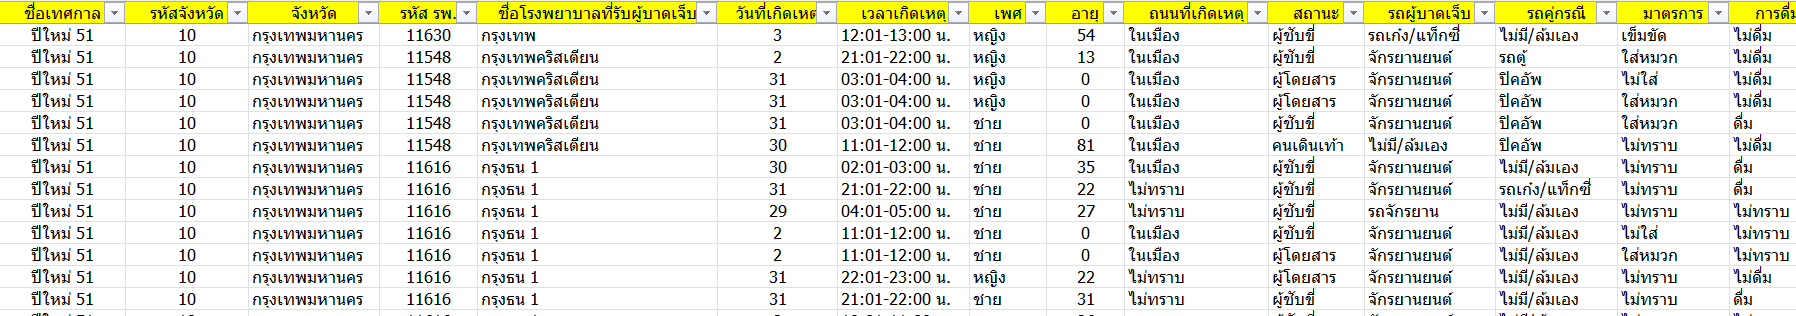

In [ ]:
import pandas as pd

df=pd.read_excel('https://data.go.th/dataset/d46af694-d117-4253-b426-1203a6213d30/resource/78d4f56e-8f2f-4bb8-90c8-93d945237dff/download/___51-58_cutname_newyear_edit.xlsx')
df

**`DataFrame.to_dict(orient='dict', *, into=<class 'dict'>, index=True)`** convert the DataFrame to a dictionary.
*   `orient` : type of the values of the dictionary. Default is 'dict' produces dict like `{column -> {index -> value}}`. With orient 'records' the key-value pairs are list like `[{column -> value}, … , {column -> value}]`
*   `into` : class `collections.abc.MutableMapping` subclass used for all Mappings in the return value. Default is `dict`.
*   `index` : Whether to include the index item. Default is `True`.



In [ ]:
# Convert DataFrame to Dictionary
list_of_dicts = df.to_dict('records')
list_of_dicts

In [ ]:
# Check existing databases
client.list_database_names()

In [ ]:
# Insert into collection 'main_data' of database 'accident_data'


### Data Exploration
**`db.list_collection_names()`** list the collections in a database







In [ ]:
# Observe database changes
client['accident_data'].list_collection_names()

In [ ]:
# Access main_data collection and access first document


#### Filter by Some Columns

In [ ]:
[rec for rec in accident_collection.find({'อายุ':{'$gt':50},'รถผู้บาดเจ็บ':'จักรยานยนต์'},{'รถคู่กรณี':1})]

## Regex

### **Basic Syntax**
```python
collection.find({"field": {"$regex": "pattern"}})
```

---

### **Examples of Regular Expressions in PyMongo**

#### 1. **Match a Substring**
Find documents where the field contains the substring "abc":
```
results = collection.find({"field": {"$regex": "abc"}})
```

#### 2. **Match Beginning of a String**
Use `^` to match strings starting with "abc":
```python
results = collection.find({"field": {"$regex": "^abc"}})
```

#### 3. **Match End of a String**
Use `$` to match strings ending with "xyz":
```python
results = collection.find({"field": {"$regex": "xyz$"}})
```

#### 4. **Match Any Character (Wildcard)**
Use `.` to match any single character:
```python
results = collection.find({"field": {"$regex": "a.c"}})  # Matches "abc", "a_c", etc.
```

#### 5. **Match Zero or More Occurrences**
Use `*` to match zero or more of the preceding character:
```python
results = collection.find({"field": {"$regex": "a*"}})  # Matches "a", "aa", "", etc.
```

#### 6. **Match One or More Occurrences**
Use `+` to match one or more of the preceding character:
```python
results = collection.find({"field": {"$regex": "a+"}})  # Matches "a", "aa", etc. (but not empty strings)
```

#### 7. **Match a Range of Characters**
Use `[ ]` to define a range:
```python
results = collection.find({"field": {"$regex": "[a-c]"}})  # Matches "a", "b", or "c"
```

#### 8. **Exclude Characters**
Use `[^ ]` to exclude a range of characters:
```python
results = collection.find({"field": {"$regex": "[^a-c]"}})  # Matches anything except "a", "b", or "c"
```



**`collection.distinct(key, filter=None)`** finds the distinct field values across a subset of documents in a collection

*   `key` : name of fieldto find distinct values for
*   `filter` : query filter that specifies the documents to retrieve distinct values from



In [ ]:
# Get distinct value for field 'ผลการรักษา' of accident_collection


In [ ]:
# substring with regex for ผลการรักษา that matches substring ตาย
# This give that same result as accident_collection.distinct('ผลการรักษา', filter={"ผลการรักษา": {"$regex": "ตาย"}})


In [ ]:
[rec for rec in accident_collection.find({'สถานะ':{'$regex': 'ขี่'}}, {'สถานะ':1})]

In [ ]:
# finds the distinct field values for 'เวลาเกิดเหตุ'


In [ ]:
# Observe เวลาเกิดเหตุ that starts with 12
accident_collection.find({"เวลาเกิดเหตุ": {"$regex": "^12"}}).distinct('เวลาเกิดเหตุ')

In [ ]:
# Find number of documents which เวลาเกิดเหตุ that starts with 12


In [ ]:
# choose documents only from 21, 22, 23, 24 hr


### Actual Aggragation Function

**`collection.aggregate(pipeline)`** performs an aggregation using the aggregation framework on this collection. It processes and transforms data through a series of stages, such as filtering, grouping, sorting, and more, using MongoDB's aggregation pipeline.
*   `pipeline` : list of aggregation pipeline stages. Each stage is a dictionary specifying an operation

Example of aggregation stages
1.   `$match`: Filters documents
2.   `$group`: Groups documents by a specified field and performs aggregations like sum, average, etc.
3.   `$sort`: Sorts documents.
4.   `$limit`: Limits the number of documents.

In [ ]:
# Filter for documents that "ผลการรักษา" contains "ตาย"
# Sum number of documents as count Group by จังหวัด
# Sort count in descending order
# Limit to 10

# results=

[rec for rec in results]

In [ ]:
# Slice the df data frame for rows that "ผลการรักษา" contains "ตาย"
# Group by จังหวัด with count
# Sort by ชื่อเทศกาล in descending order
# Slice for column 'ชื่อเทศกาล' for 10 rows


## Full text search

**KaggleHub** is a Python package that provides a simple API to access Kaggle resources

**`kagglehub.dataset_download(dataset)`** downloads the latest version of Kaggle dataset.

In [ ]:
import kagglehub

# Download latest version. See https://www.kaggle.com/datasets/zynicide/wine-reviews
path = kagglehub.dataset_download("zynicide/wine-reviews")

print("Path to dataset files:", path)

In [ ]:
# List the file stored in our colab VM environment
! ls -l /root/.cache/kagglehub/datasets/zynicide/wine-reviews/versions/4/

In [ ]:
# Read file winemag-data-130k-v2.csv into DataFrame
wine_df=pd.read_csv('/root/.cache/kagglehub/datasets/zynicide/wine-reviews/versions/4/winemag-data-130k-v2.csv')

In [ ]:
# Show the DataFrame
wine_df

In [ ]:
# Convert wine_df to dictionary
# With orient 'records' the key-value pairs are list like [{column -> value}, … , {column -> value}]
# Insert into collection 'winemag-data-130k-v2' of database 'wine_data'



In [ ]:
# load collection 'winemag-data-130k-v2' of database 'wine_data'


In [ ]:
# Observe a document


**`collection.create_index(keys)`** creates an index on collection.
*   `keys` : a key or a list containing (key, direction) pairs or keys. If no direction is given, ASCENDING will be assumed.



In [ ]:
# Create index for wine_collection on key 'description' with 'text' direction (text index)


In [ ]:
# With text index, perform text search
# Use $text operator to search for text in fields that have text index
# Use $search operator to give the term to search for
import time


start_time = time.time()

print(f"Total Execution Time: {time.time()-start_time:.6f} seconds")


In [ ]:
# When text index is not used
# Perform regex search on "description"
# Query for all documents where "description" contains substring "fruity"


start_time = time.time()

print(f"Total Execution Time: {time.time()-start_time:.6f} seconds")
